In [1]:
import numpy as np
import matplotlib.image as im
import matplotlib.pyplot as plt
import os
from pathlib import Path

file = os.path.join('.', 'images', 'python.png')


In [2]:
def file_to_matriz(nome_file: str) -> np.array:
    matriz_colorida = im.imread(file)
    matriz_8bit = matriz_colorida * 255
    matriz_8bit = matriz_8bit.astype(np.uint16)
    return matriz_8bit

matriz_colorida = file_to_matriz(file)

In [3]:
file_name, file_extension = os.path.splitext(file)

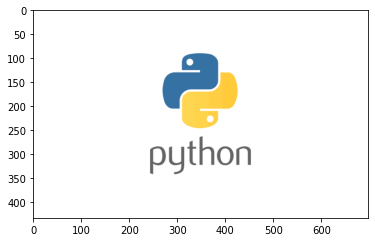

In [4]:
plt.imshow(matriz_colorida)

In [5]:
def imagem_to_cinza(matrix_colorida: np.array) -> np.array:
    linhas = matrix_colorida.shape[0]
    colunas = matrix_colorida.shape[1]
    cores = matrix_colorida.shape[2]
    
    matrix_gray = np.zeros((linhas, colunas))

    for i in range(linhas):
        for j in range(colunas):
            for cor in range(cores):
                r, g, b, a = matrix_colorida[i, j]
                matrix_gray[i, j] = int((r + g + b + a) / 4)

    return matrix_gray

In [6]:
matriz_colorida

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


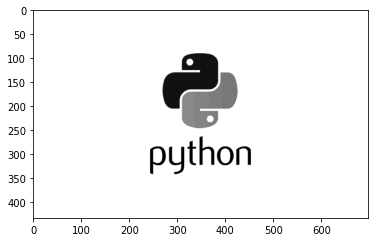

In [7]:
matriz_cinza = imagem_to_cinza(matriz_colorida)
plt.imshow(matriz_cinza, cmap='gray')
print(matriz_cinza)

In [8]:
histograma = np.zeros(256).astype(int)

linhas = matriz_cinza.shape[0]
colunas = matriz_cinza.shape[1]

for i in range(linhas):
    for j in range(colunas):
        cor = matriz_cinza[i,j]
        cor = int(cor)
        histograma[cor] = histograma[cor] + 1

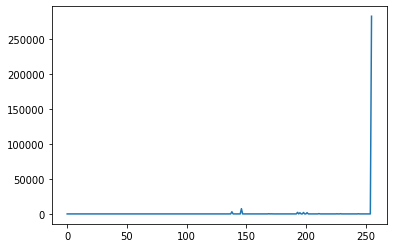

In [9]:
plt.plot(range(256), histograma)

In [10]:


sorted_histogram = sorted(histograma)

best_index = int(len(sorted_histogram)/2)

In [11]:
linhas = matriz_cinza.shape[0]
colunas = matriz_cinza.shape[1]
threshold = best_index
matrix_segmentada = np.zeros((linhas, colunas))

In [12]:


for i in range(linhas):
    for j in range(colunas):
        cor = matriz_cinza[i,j]
        if cor < threshold:
            matrix_segmentada[i,j] = 0
        else:
            matrix_segmentada[i,j] = 255
                


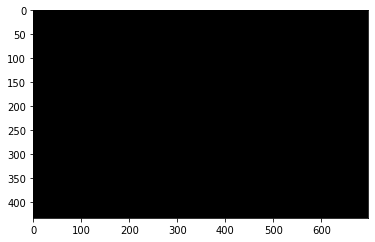

In [13]:
plt.imshow(matrix_segmentada, cmap='gray')

In [14]:
def bht(hist, min_count: int = 5) -> int:
    """Balanced histogram thresholding."""
    n_bins = len(hist)  # assumes 1D histogram
    h_s = 0
    while hist[h_s] < min_count:
        h_s += 1  # ignore small counts at start
    h_e = n_bins - 1
    while hist[h_e] < min_count:
        h_e -= 1  # ignore small counts at end
    # use mean intensity of histogram as center; alternatively: (h_s + h_e) / 2)
    h_c = int(round(np.average(np.linspace(0, 2 ** 8 - 1, n_bins), weights=hist)))
    w_l = np.sum(hist[h_s:h_c])  # weight in the left part
    w_r = np.sum(hist[h_c : h_e + 1])  # weight in the right part

    while h_s < h_e:
        if w_l > w_r:  # left part became heavier
            w_l -= hist[h_s]
            h_s += 1
        else:  # right part became heavier
            w_r -= hist[h_e]
            h_e -= 1
        new_c = int(round((h_e + h_s) / 2))  # re-center the weighing scale

        if new_c < h_c:  # move bin to the other side
            w_l -= hist[h_c]
            w_r += hist[h_c]
        elif new_c > h_c:
            w_l += hist[h_c]
            w_r -= hist[h_c]

        h_c = new_c

    return h_c

313464 0


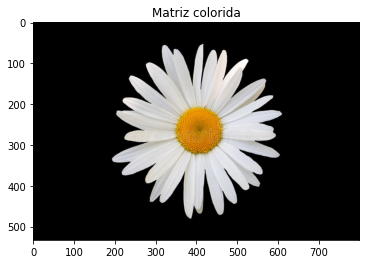

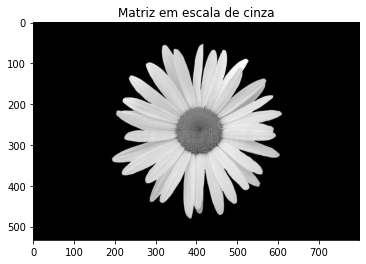

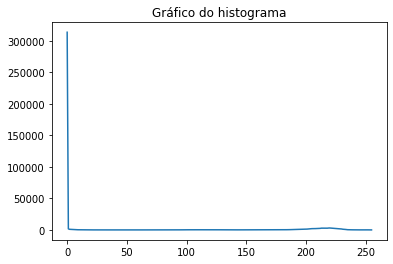

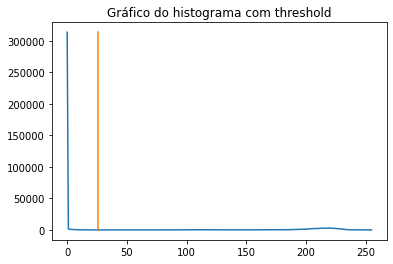

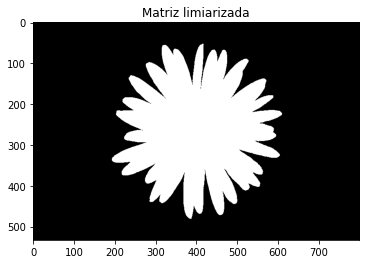

In [26]:

import numpy as np
import matplotlib.image as im
import matplotlib.pyplot as plt
import os
from pathlib import Path


file = os.path.join('.', 'images', 'flower.jpg')
file_name, file_extension = os.path.splitext(file)
def transform_matrix(file: str, png: bool) -> np.array:
    matrix_8bit = im.imread(file)
    if(png):
        matrix_8bit *= 255
    matrix_8bit = matrix_8bit.astype(np.uint16)
    return matrix_8bit

def image_to_gray(matrix: np.array) -> np.array:
    linhas = matrix.shape[0]
    colunas = matrix.shape[1]

    matrix_gray = np.zeros((linhas, colunas))

    for i in range(linhas):
        for j in range(colunas):
            r, g, b = matrix[i, j]
            matrix_gray[i, j] = int((r + g + b ) / 3)
    return matrix_gray

def image_to_gray_alpha(matrix: np.array) -> np.array:
    linhas = matrix.shape[0]
    colunas = matrix.shape[1]
    colors = matrix.shape[2]
    
    matrix_gray = np.zeros((linhas, colunas))

    for i in range(linhas):
        for j in range(colunas):
            for color in range(colors):
                r, g, b, a = matrix[i, j]
                matrix_gray[i, j] = int((r + g + b + a) / 4)
    return matrix_gray


if(file_extension == '.png'):
    matrix_colored = transform_matrix(file, True)
    matrix_gray = image_to_gray_alpha(matrix_colored)
else:
    matrix_colored = transform_matrix(file, False)
    matrix_gray = image_to_gray(matrix_colored)


histogram = np.zeros(256).astype(int)

row = matrix_gray.shape[0]
column = matrix_gray.shape[1]

for i in range(row):
    for j in range(column):
        color = matrix_gray[i,j]
        color = int(color)
        histogram[color] = histogram[color] + 1

        


greater_index = 0
greater_value = 0
for index, value in enumerate(histogram):
    if(value > greater_value):
        greater_value = value
        greater_index = index
        
print(greater_value, greater_index)
if(greater_index < 150):
    threshold = greater_index + (len(histogram) * 1/10)
else:
    threshold = greater_index - (len(histogram) * 1/10)



"""

def calc_threshold(t1, histogram):
    newT = t1
    
    while(newT + t1 < 4):
        right_list = []
        left_list = []
        for i in range(255):
                if(histogram[i] <= newT):
                    left_list.append(histogram[i])
                else:
                    right_list.append(histogram[i])
        r_mean = np.mean(right_list)
        l_mean = np.mean(left_list)
        newT = (r_mean + l_mean)/2
    return newT

threshold = calc_threshold(threshold, histogram)
"""

# sorted_histogram = sorted(histogram)
# threshold = int(len(sorted_histogram)/2)

# threshold = bht(histogram)

matrix_threshold = np.zeros((row, column))
for i in range(row):
    for j in range(column):
        cor = matrix_gray[i, j]
        if cor < threshold:
            matrix_threshold[i, j] = 0
        else:
            matrix_threshold[i, j] = 255


            
#Enviando as imagens de relatorio para a pasta "report"
Path("./report").mkdir(parents=True, exist_ok=True)
path = os.path.join('.', 'report')
       
plt.figure()
plt.title('Matriz colorida')
plt.imshow(matrix_colored)
plt.savefig(os.path.join(path, 'matrix_colored.png'))

plt.figure()
plt.title('Matriz em escala de cinza')
plt.imshow(matrix_gray, cmap='gray')
plt.savefig(os.path.join(path, 'matrix_gray.png'))

plt.figure()
plt.title('Gráfico do histograma')
plt.plot(range(256), histogram)
plt.savefig(os.path.join(path, 'histogram.png'))

plt.figure()
plt.title('Gráfico do histograma com threshold')
plt.plot(range(256), histogram)
plt.plot([threshold, threshold], [0, max(histogram)])
plt.savefig(os.path.join(path, 'histogram_with_threshold'))
            
plt.figure()
plt.title('Matriz limiarizada')
plt.imshow(matrix_threshold, cmap='gray')
plt.savefig(os.path.join(path, 'matrix_threshold.png'))




